In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
print("Setup complete")

Setup complete


In [18]:
data = pd.read_csv('train.csv', encoding='unicode_escape')
data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [19]:
data.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [20]:
data['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [21]:
data.shape

(27481, 10)

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer


In [25]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [31]:
# Define a function for data preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'\W+|\d+', ' ', text)
        tokens = word_tokenize(text)
        stemmer = PorterStemmer()
        processed_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
        processed_text = ' '.join(processed_tokens)
        return processed_text
    else:
        return ""

In [33]:
data['text'] = data['text'].apply(preprocess_text)
data['text']

0                                               respond go
1                                  sooo sad miss san diego
2                                               boss bulli
3                                      interview leav alon
4                             son put relea alreadi bought
                               ...                        
27476    wish could come see u denver husband lost job ...
27477    wonder rake client made clear net forc dev lea...
27478    yay good enjoy break probabl need hectic weeke...
27479                                                worth
27480                           flirt go atg smile yay hug
Name: text, Length: 27481, dtype: object

In [34]:
#calculate word frequencies
all_words = [word for tokens in data['text'] for word in tokens]
fdist = FreqDist(all_words)

# Print the most common words and their frequencies
print(fdist.most_common(10))

[(' ', 170620), ('e', 89836), ('o', 77292), ('a', 74544), ('t', 70395), ('i', 60788), ('r', 52934), ('n', 51399), ('l', 49596), ('s', 40486)]


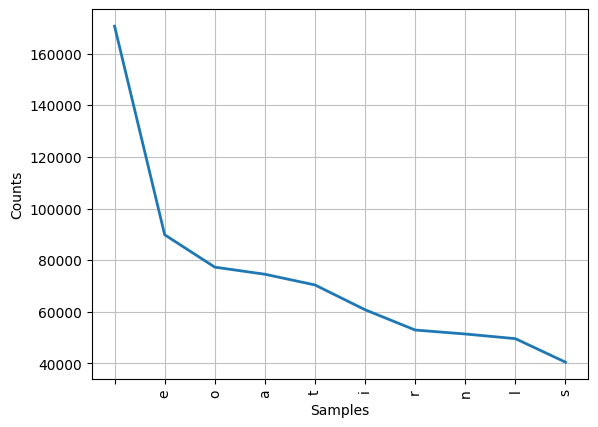

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [36]:
#plot the common words
fdist.plot(10, cumulative=False)

<AxesSubplot: >

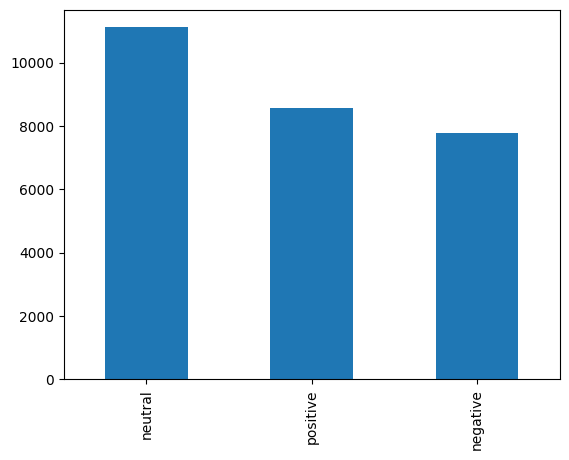

In [37]:
# Analyze sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')

In [38]:
#preparing the data
x = data['text']
y = data['sentiment']

In [39]:
x

0                                               respond go
1                                  sooo sad miss san diego
2                                               boss bulli
3                                      interview leav alon
4                             son put relea alreadi bought
                               ...                        
27476    wish could come see u denver husband lost job ...
27477    wonder rake client made clear net forc dev lea...
27478    yay good enjoy break probabl need hectic weeke...
27479                                                worth
27480                           flirt go atg smile yay hug
Name: text, Length: 27481, dtype: object

In [40]:
y

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27481, dtype: object

In [88]:
#spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [89]:
#applying features extraction techniques using CountVectorizer
vectorizer = CountVectorizer()
x_train_counts = vectorizer.fit_transform(x_train)
x_test_counts = vectorizer.transform(x_test)

In [90]:
#Train the sentiment analysis model usingNaive Bayes
model = MultinomialNB()
model.fit(x_train_counts, y_train)

MultinomialNB()

In [91]:
#printing actual y_test value
y_test

1588     positive
23879     neutral
6561      neutral
2602     negative
4003     positive
           ...   
616      positive
4504      neutral
9887     negative
19734    positive
16604    positive
Name: sentiment, Length: 5497, dtype: object

In [92]:
#printing predicted y_test value
y_pred = model.predict(x_test_counts)
y_pred

array(['negative', 'positive', 'neutral', ..., 'negative', 'neutral',
       'positive'], dtype='<U8')

In [93]:
#evaluating the model
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy*100}%")

              precision    recall  f1-score   support

    negative       0.71      0.60      0.65      1562
     neutral       0.60      0.68      0.64      2230
    positive       0.70      0.67      0.69      1705

    accuracy                           0.66      5497
   macro avg       0.67      0.65      0.66      5497
weighted avg       0.66      0.66      0.66      5497

Accuracy:65.58122612334%


In [95]:
from sklearn import svm

In [96]:
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(x_train_counts, y_train)

SVC(kernel='linear')

In [97]:
svm_y_pred = svm_model.predict(x_test_counts)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Accuracy:{svm_accuracy*100}%")

Accuracy:69.81990176459887%


Based on the obtained accuracies, it can be concluded that the SVM classification model (69.82% accuracy) performs slightly better than the Naive Bayes classification model (65.58% accuracy) for the given sentiment analysis task.